In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [28]:
# Read the raw file
with open('./data/NEW-DATA-2.T15.txt', 'r') as file:
    lines = file.readlines()

In [29]:
# Extract clean column names from the header
header = lines[0].strip()
column_names = []
for col in header.split():
    if ':' in col:
        column_names.append(col.split(':', 1)[1])  # Get part after colon


In [30]:
# Process data rows
data_rows = []
for line in lines[1:]:
    if line.strip():  # Skip empty lines
        values = line.strip().split()
        if len(values) == len(column_names):
            data_rows.append(values)

In [31]:
# Create DataFrame
df2 = pd.DataFrame(data_rows, columns=column_names)

# Display the DataFrame
print("Dataframe with clean column names:")
df2.head()



Dataframe with clean column names:


Date   Time Temperature_Comedor_Sensor Temperature_Habitacion_Sensor  \
0  18/04/2012  00:00                       20.2                          19.8   
1  18/04/2012  00:15                    20.1593                         19.76   
2  18/04/2012  00:30                     20.074                        19.658   
3  18/04/2012  00:45                    19.9773                       19.5833   
4  18/04/2012  01:00                    19.8933                          19.5   

  Weather_Temperature CO2_Comedor_Sensor CO2_Habitacion_Sensor  \
0                  13             207.84                206.56   
1                  13            207.499               206.101   
2                  13             207.36               206.805   
3                  13            207.445               206.325   
4                  13             207.84               205.952   

  Humedad_Comedor_Sensor Humedad_Habitacion_Sensor Lighting_Comedor_Sensor  \
0                  31.58                     30.16                   11.72   
1                 31.624                   30.0613                  11.524   
2                31.6507                   30.1773                  11.622   
3                31.6987                    30.256                 11.7847   
4                31.7707                    30.384                 11.5887   

   ... Meteo_Exterior_Sol_Oest Meteo_Exterior_Sol_Est Meteo_Exterior_Sol_Sud  \
0  ...                       0                      0                      0   
1  ...                       0                      0                      0   
2  ...                       0                      0                      0   
3  ...                       0                      0                      0   
4  ...                       0                      0                      0   

  Meteo_Exterior_Piranometro Exterior_Entalpic_1 Exterior_Entalpic_2  \
0                      -3.12                   0                   0   
1                     -2.808                   0                   0   
2                     -2.964                   0                   0   
3                   -3.02933                   0                   0   
4                     -2.886                   0                   0   

  Exterior_Entalpic_turbo Temperature_Exterior_Sensor Humedad_Exterior_Sensor  \
0                       0                       16.07                   39.08   
1                       0                       16.04                  38.968   
2                       0                      16.016                 38.9467   
3                       0                     15.9427                  39.076   
4                       0                     15.8627                 40.0413   

  Day_Of_Week  
0           3  
1           3  
2           3  
3           3  
4           3  

[5 rows x 24 columns]

In [32]:
print(f"\nNumber of columns: {len(df2.columns)}")


Number of columns: 24


In [33]:
print(f"Number of rows: {len(df2)}")

Number of rows: 1373


In [34]:
print(f"Number of unique values: {df2.nunique()}\n")

Number of unique values: Date                               15
Time                               96
Temperature_Comedor_Sensor       1240
Temperature_Habitacion_Sensor    1242
Weather_Temperature               182
CO2_Comedor_Sensor                925
CO2_Habitacion_Sensor             965
Humedad_Comedor_Sensor           1263
Humedad_Habitacion_Sensor        1283
Lighting_Comedor_Sensor           565
Lighting_Habitacion_Sensor        693
Precipitacion                      14
Meteo_Exterior_Crepusculo         329
Meteo_Exterior_Viento            1124
Meteo_Exterior_Sol_Oest           726
Meteo_Exterior_Sol_Est            725
Meteo_Exterior_Sol_Sud            731
Meteo_Exterior_Piranometro        816
Exterior_Entalpic_1                 1
Exterior_Entalpic_2                 1
Exterior_Entalpic_turbo             1
Temperature_Exterior_Sensor      1294
Humedad_Exterior_Sensor          1336
Day_Of_Week                        14
dtype: int64



# Exploratory Data Analysis (EDA)
In this section, we perform EDA to understand the dataset better. This includes:
- Checking for missing values
- Visualizing distributions of key features
- Identifying correlations between features
- Detecting outliers

In [35]:
# Check for missing values
missing_values = df2.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date                             0
Time                             0
Temperature_Comedor_Sensor       0
Temperature_Habitacion_Sensor    0
Weather_Temperature              0
CO2_Comedor_Sensor               0
CO2_Habitacion_Sensor            0
Humedad_Comedor_Sensor           0
Humedad_Habitacion_Sensor        0
Lighting_Comedor_Sensor          0
Lighting_Habitacion_Sensor       0
Precipitacion                    0
Meteo_Exterior_Crepusculo        0
Meteo_Exterior_Viento            0
Meteo_Exterior_Sol_Oest          0
Meteo_Exterior_Sol_Est           0
Meteo_Exterior_Sol_Sud           0
Meteo_Exterior_Piranometro       0
Exterior_Entalpic_1              0
Exterior_Entalpic_2              0
Exterior_Entalpic_turbo          0
Temperature_Exterior_Sensor      0
Humedad_Exterior_Sensor          0
Day_Of_Week                      0
dtype: int64


In [36]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%Y')
df2['Time'] = pd.to_datetime(df2['Time'], format='%H:%M')
df2['Hour'] = df2['Time'].dt.hour

In [37]:
# Add Month as a feature
df2['Month'] = df2['Date'].dt.month

In [38]:
# Check data types of the columns
print(df2.dtypes)

Date                             datetime64[ns]
Time                             datetime64[ns]
Temperature_Comedor_Sensor               object
Temperature_Habitacion_Sensor            object
Weather_Temperature                      object
CO2_Comedor_Sensor                       object
CO2_Habitacion_Sensor                    object
Humedad_Comedor_Sensor                   object
Humedad_Habitacion_Sensor                object
Lighting_Comedor_Sensor                  object
Lighting_Habitacion_Sensor               object
Precipitacion                            object
Meteo_Exterior_Crepusculo                object
Meteo_Exterior_Viento                    object
Meteo_Exterior_Sol_Oest                  object
Meteo_Exterior_Sol_Est                   object
Meteo_Exterior_Sol_Sud                   object
Meteo_Exterior_Piranometro               object
Exterior_Entalpic_1                      object
Exterior_Entalpic_2                      object
Exterior_Entalpic_turbo                 

Missing values in each column:
Date                             0
Time                             0
Temperature_Comedor_Sensor       0
Temperature_Habitacion_Sensor    0
Weather_Temperature              0
CO2_Comedor_Sensor               0
CO2_Habitacion_Sensor            0
Humedad_Comedor_Sensor           0
Humedad_Habitacion_Sensor        0
Lighting_Comedor_Sensor          0
Lighting_Habitacion_Sensor       0
Precipitacion                    0
Meteo_Exterior_Crepusculo        0
Meteo_Exterior_Viento            0
Meteo_Exterior_Sol_Oest          0
Meteo_Exterior_Sol_Est           0
Meteo_Exterior_Sol_Sud           0
Meteo_Exterior_Piranometro       0
Exterior_Entalpic_1              0
Exterior_Entalpic_2              0
Exterior_Entalpic_turbo          0
Temperature_Exterior_Sensor      0
Humedad_Exterior_Sensor          0
Day_Of_Week                      0
Hour                             0
Month                            0
dtype: int64


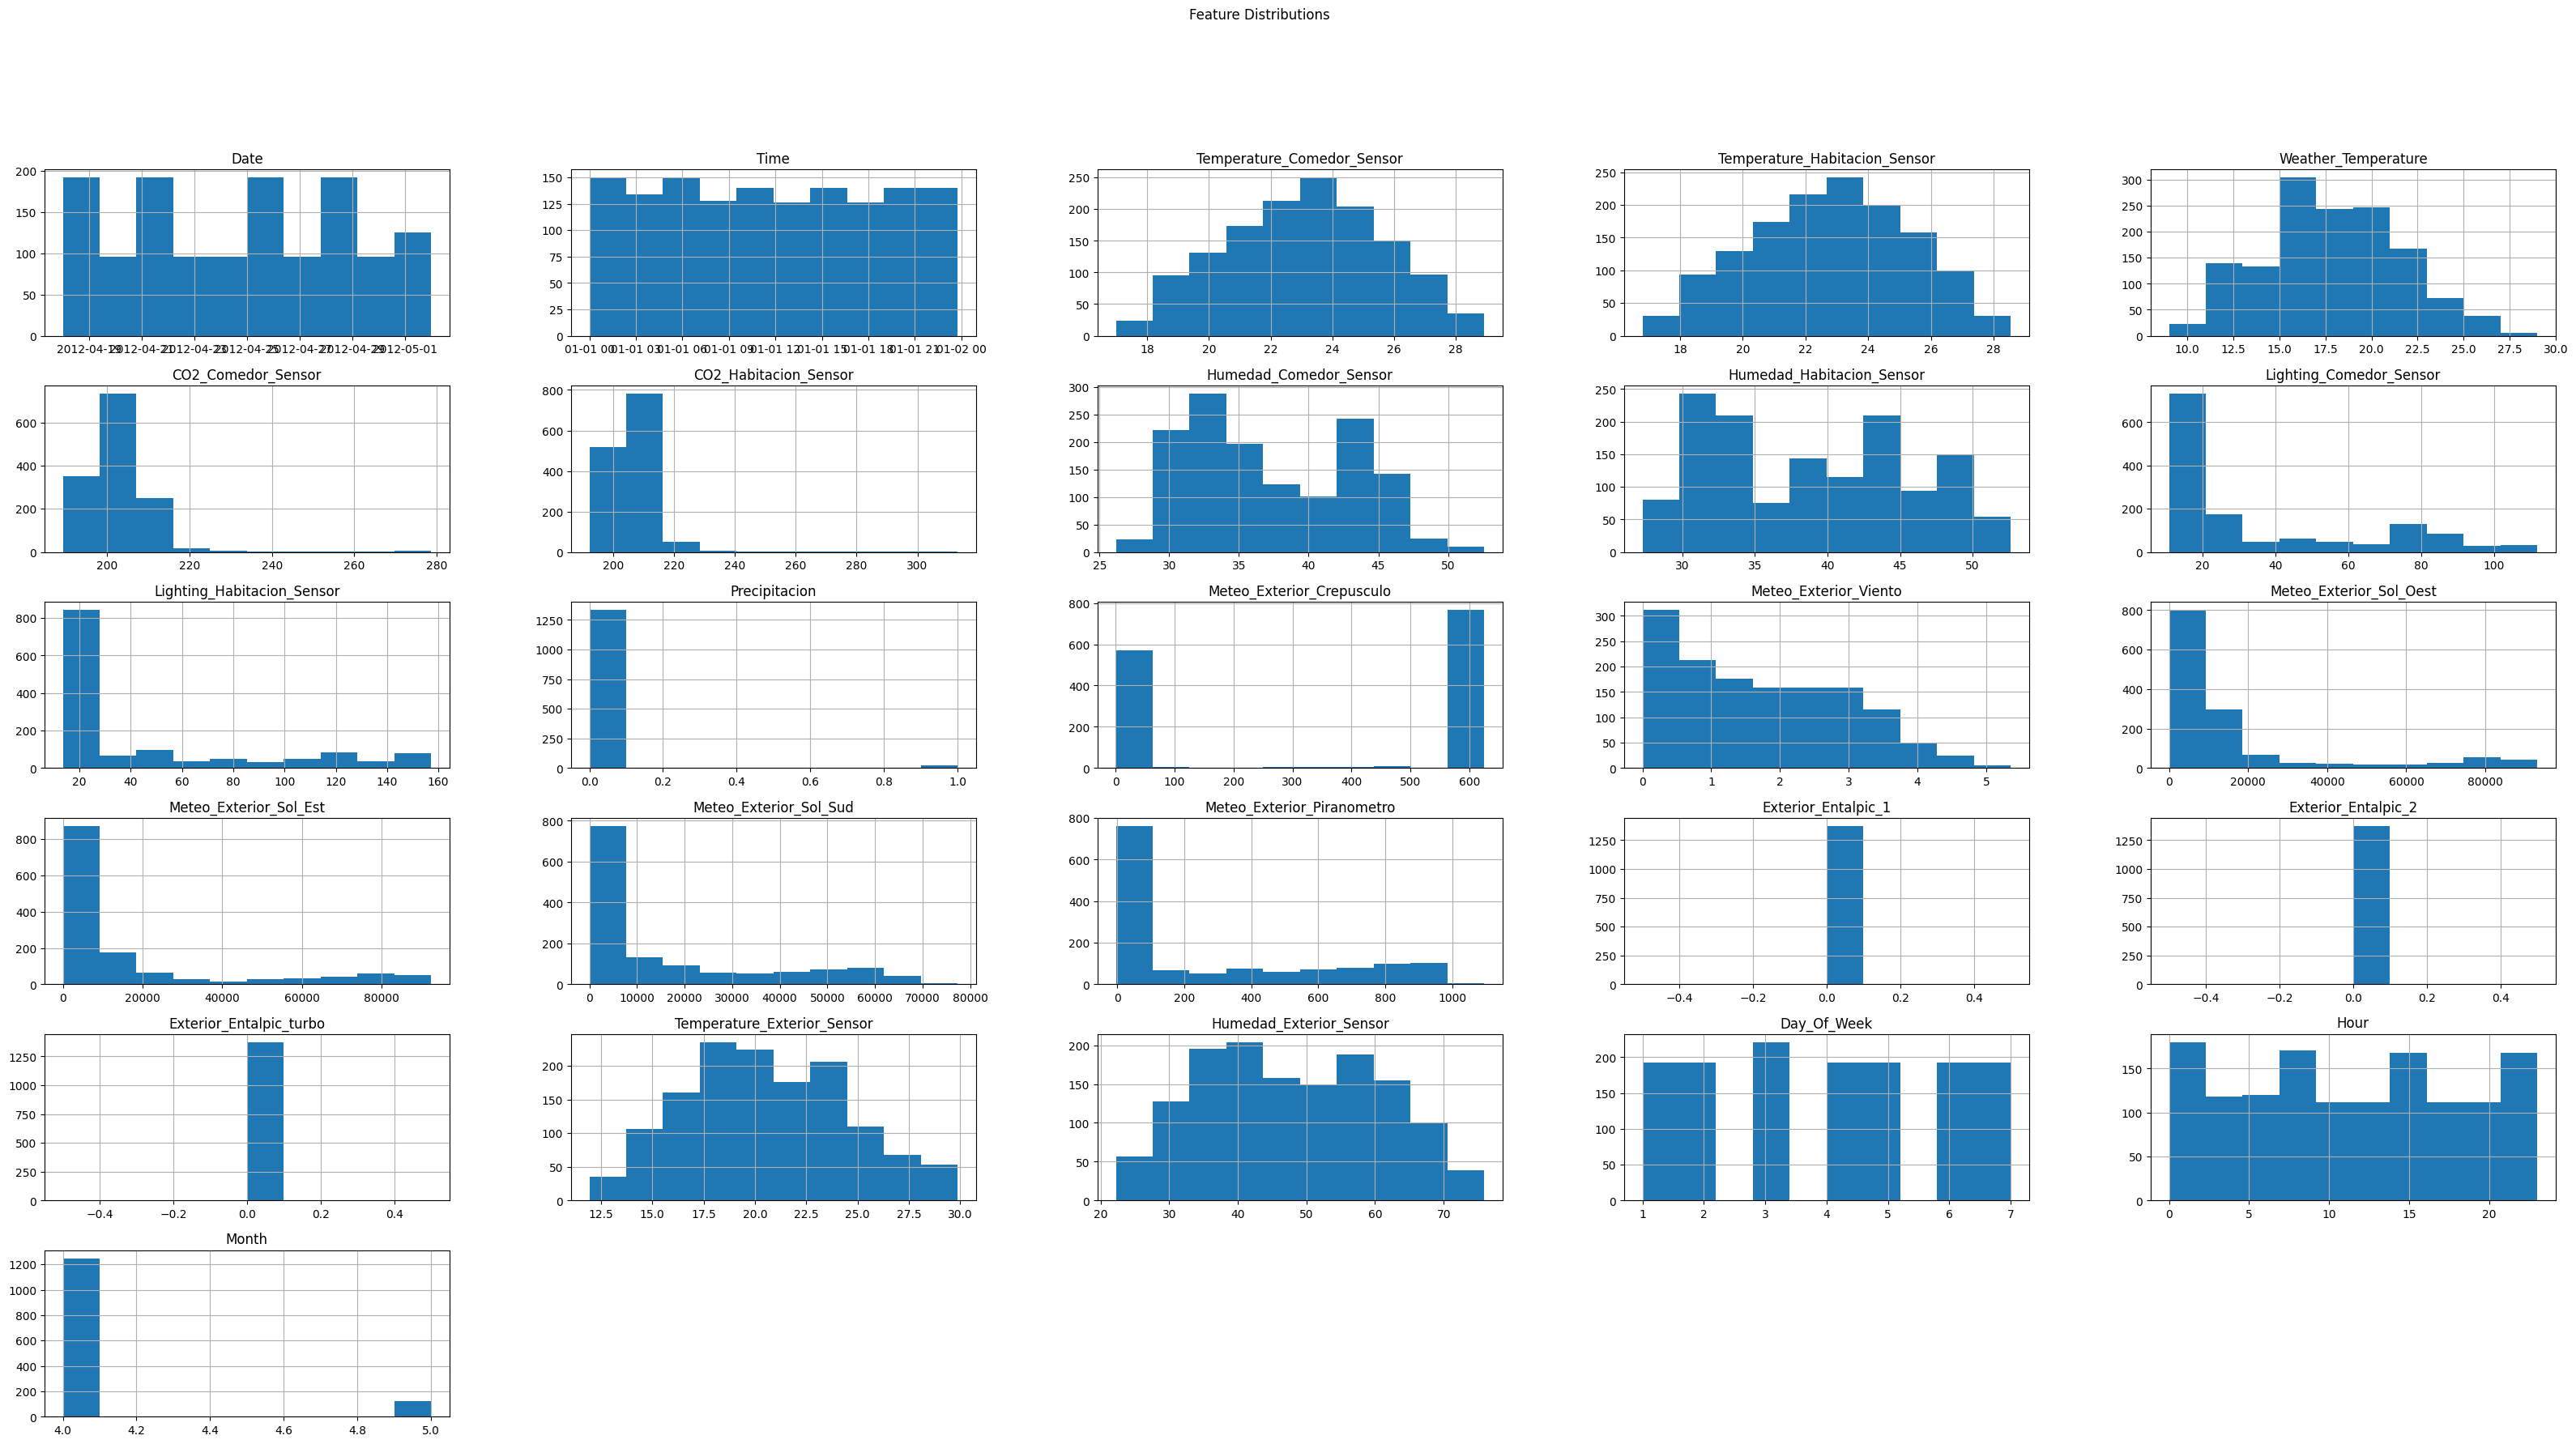

In [39]:
# Convert columns to numeric where applicable
for col in df2.columns:
    if df2[col].dtype == 'object':  # Check if column is of type object
        df2[col] = pd.to_numeric(df2[col], errors='coerce')  # Convert to numeric, coerce errors to NaN

# Drop columns with all NaN values (if conversion failed for all rows in a column)
df2 = df2.dropna(axis=1, how='all')

# Check for missing values
missing_values = df2.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Visualize distributions of numerical features
if not df2.select_dtypes(include=['number']).empty:
    df2.hist(figsize=(40, 20), )
    plt.suptitle('Feature Distributions')
    plt.show()
else:
    print("No numerical columns available for histogram plotting.")


In [40]:
# # Correlation heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
# plt.title('Feature Correlation Heatmap')
# plt.show()

In [41]:
df2.dtypes

Date                             datetime64[ns]
Time                             datetime64[ns]
Temperature_Comedor_Sensor              float64
Temperature_Habitacion_Sensor           float64
Weather_Temperature                     float64
CO2_Comedor_Sensor                      float64
CO2_Habitacion_Sensor                   float64
Humedad_Comedor_Sensor                  float64
Humedad_Habitacion_Sensor               float64
Lighting_Comedor_Sensor                 float64
Lighting_Habitacion_Sensor              float64
Precipitacion                           float64
Meteo_Exterior_Crepusculo               float64
Meteo_Exterior_Viento                   float64
Meteo_Exterior_Sol_Oest                 float64
Meteo_Exterior_Sol_Est                  float64
Meteo_Exterior_Sol_Sud                  float64
Meteo_Exterior_Piranometro              float64
Exterior_Entalpic_1                       int64
Exterior_Entalpic_2                       int64
Exterior_Entalpic_turbo                 

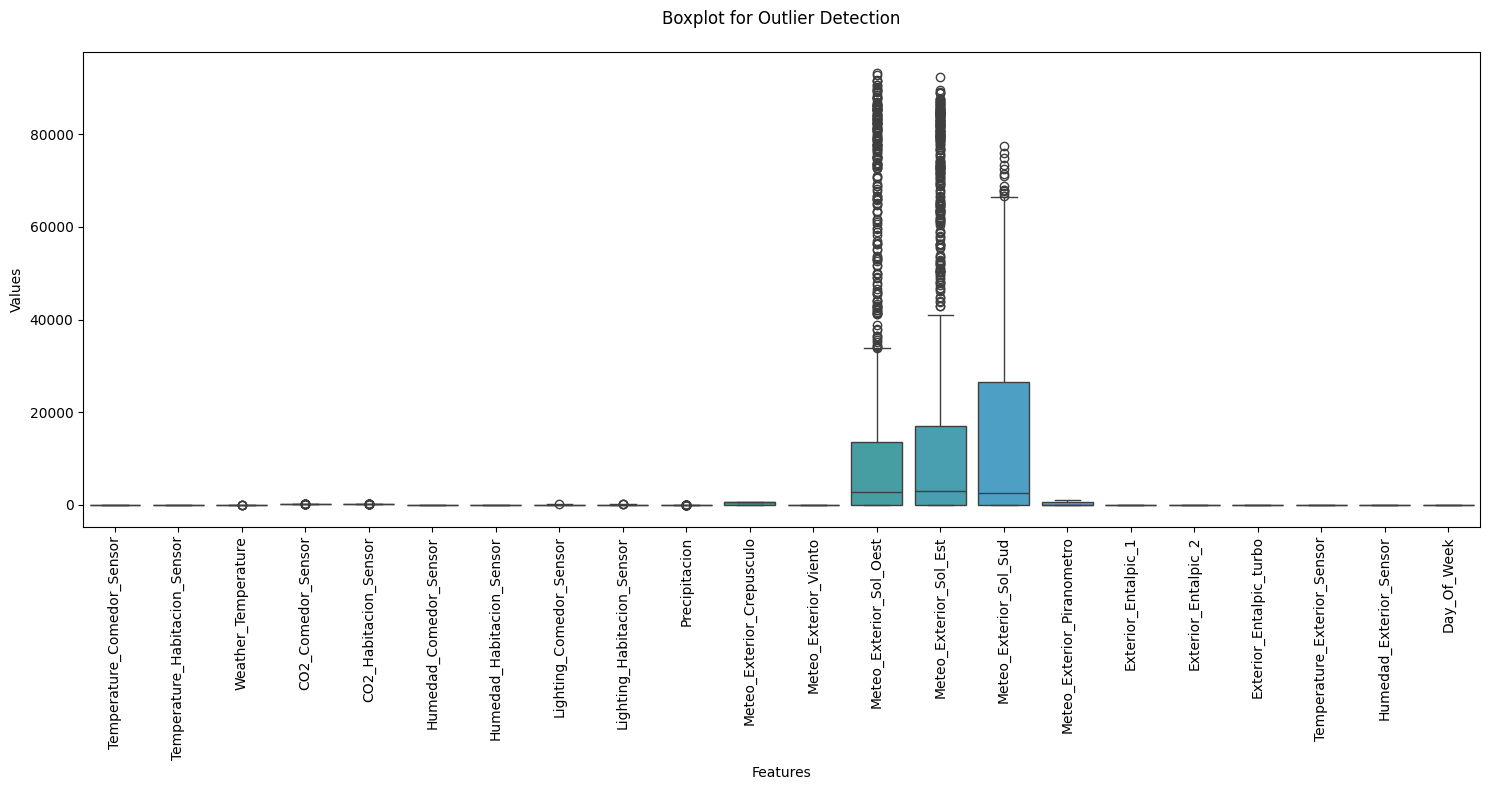

In [42]:
# # Create boxplot for outlier detection
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df2.select_dtypes(include=['float64', 'int64']))
# plt.title('Boxplot for Outlier Detection')
# plt.xticks(rotation=45)  # Rotate labels for better readability
# plt.tight_layout()  # Adjust layout to prevent label cutoff
# plt.show()


# Create improved boxplots for outlier detection
plt.figure(figsize=(15, 8))

# Select only numeric columns
numeric_df2 = df2.select_dtypes(include=['float64', 'int64'])

# Create boxplot with improved formatting
sns.boxplot(data=numeric_df2)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.title('Boxplot for Outlier Detection', pad=20)
plt.xlabel('Features')
plt.ylabel('Values')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


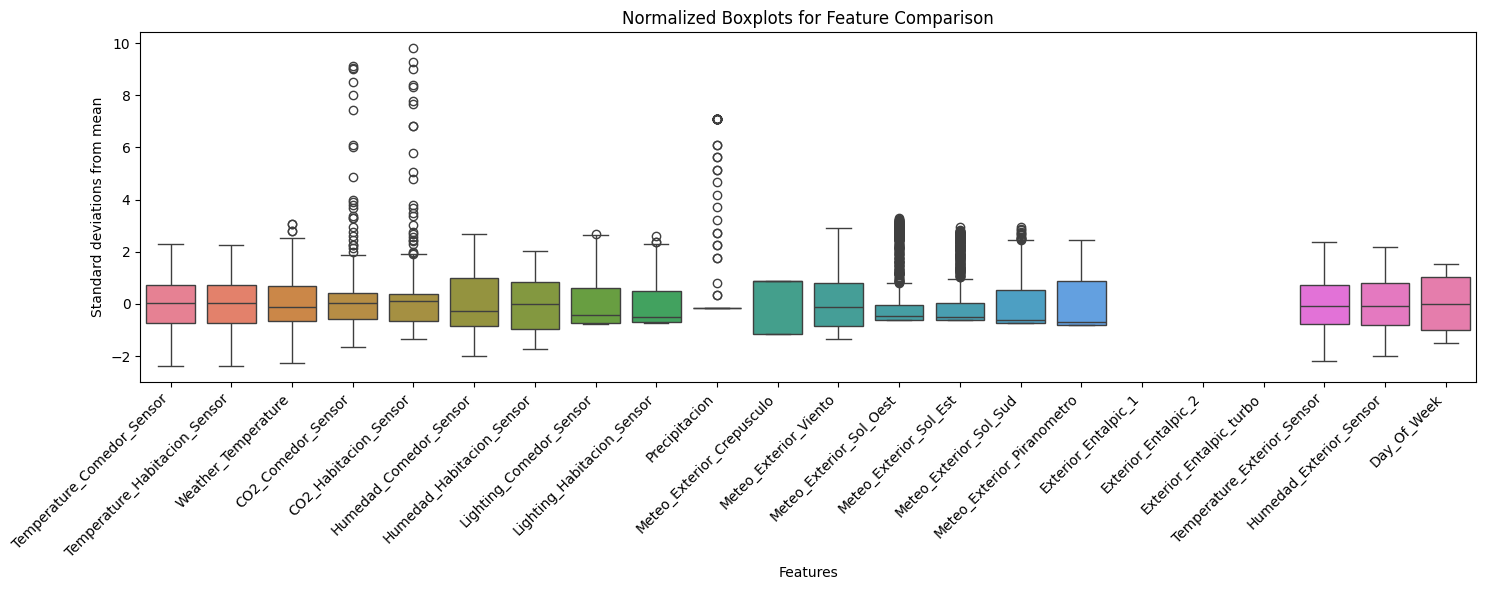

In [43]:
# Create separate boxplots for different scales
plt.figure(figsize=(15, 6))

# Select numeric columns and normalize them for better comparison
numeric_df2 = df2.select_dtypes(include=['float64', 'int64'])
normalized_df2 = (numeric_df2 - numeric_df2.mean()) / numeric_df2.std()

# Create boxplot with normalized data
sns.boxplot(data=normalized_df2)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.title('Normalized Boxplots for Feature Comparison')
plt.xlabel('Features')
plt.ylabel('Standard deviations from mean')

# Adjust layout
plt.tight_layout()
plt.show()

In [44]:
# Print summary statistics for each variable
print("\nSummary statistics:")
print(numeric_df2.describe())


Summary statistics:
       Temperature_Comedor_Sensor  Temperature_Habitacion_Sensor  \
count                 1373.000000                    1373.000000   
mean                    23.098108                      22.805766   
std                      2.552107                       2.534529   
min                     16.983300                      16.797300   
25%                     21.182700                      20.925300   
50%                     23.192000                      22.852000   
75%                     24.964000                      24.664000   
max                     28.924000                      28.548000   

       Weather_Temperature  CO2_Comedor_Sensor  CO2_Habitacion_Sensor  \
count          1373.000000         1373.000000            1373.000000   
mean             17.498908          202.816621             206.684117   
std               3.739828            8.303086              10.862867   
min               9.000000          189.195000             192.107000   
2

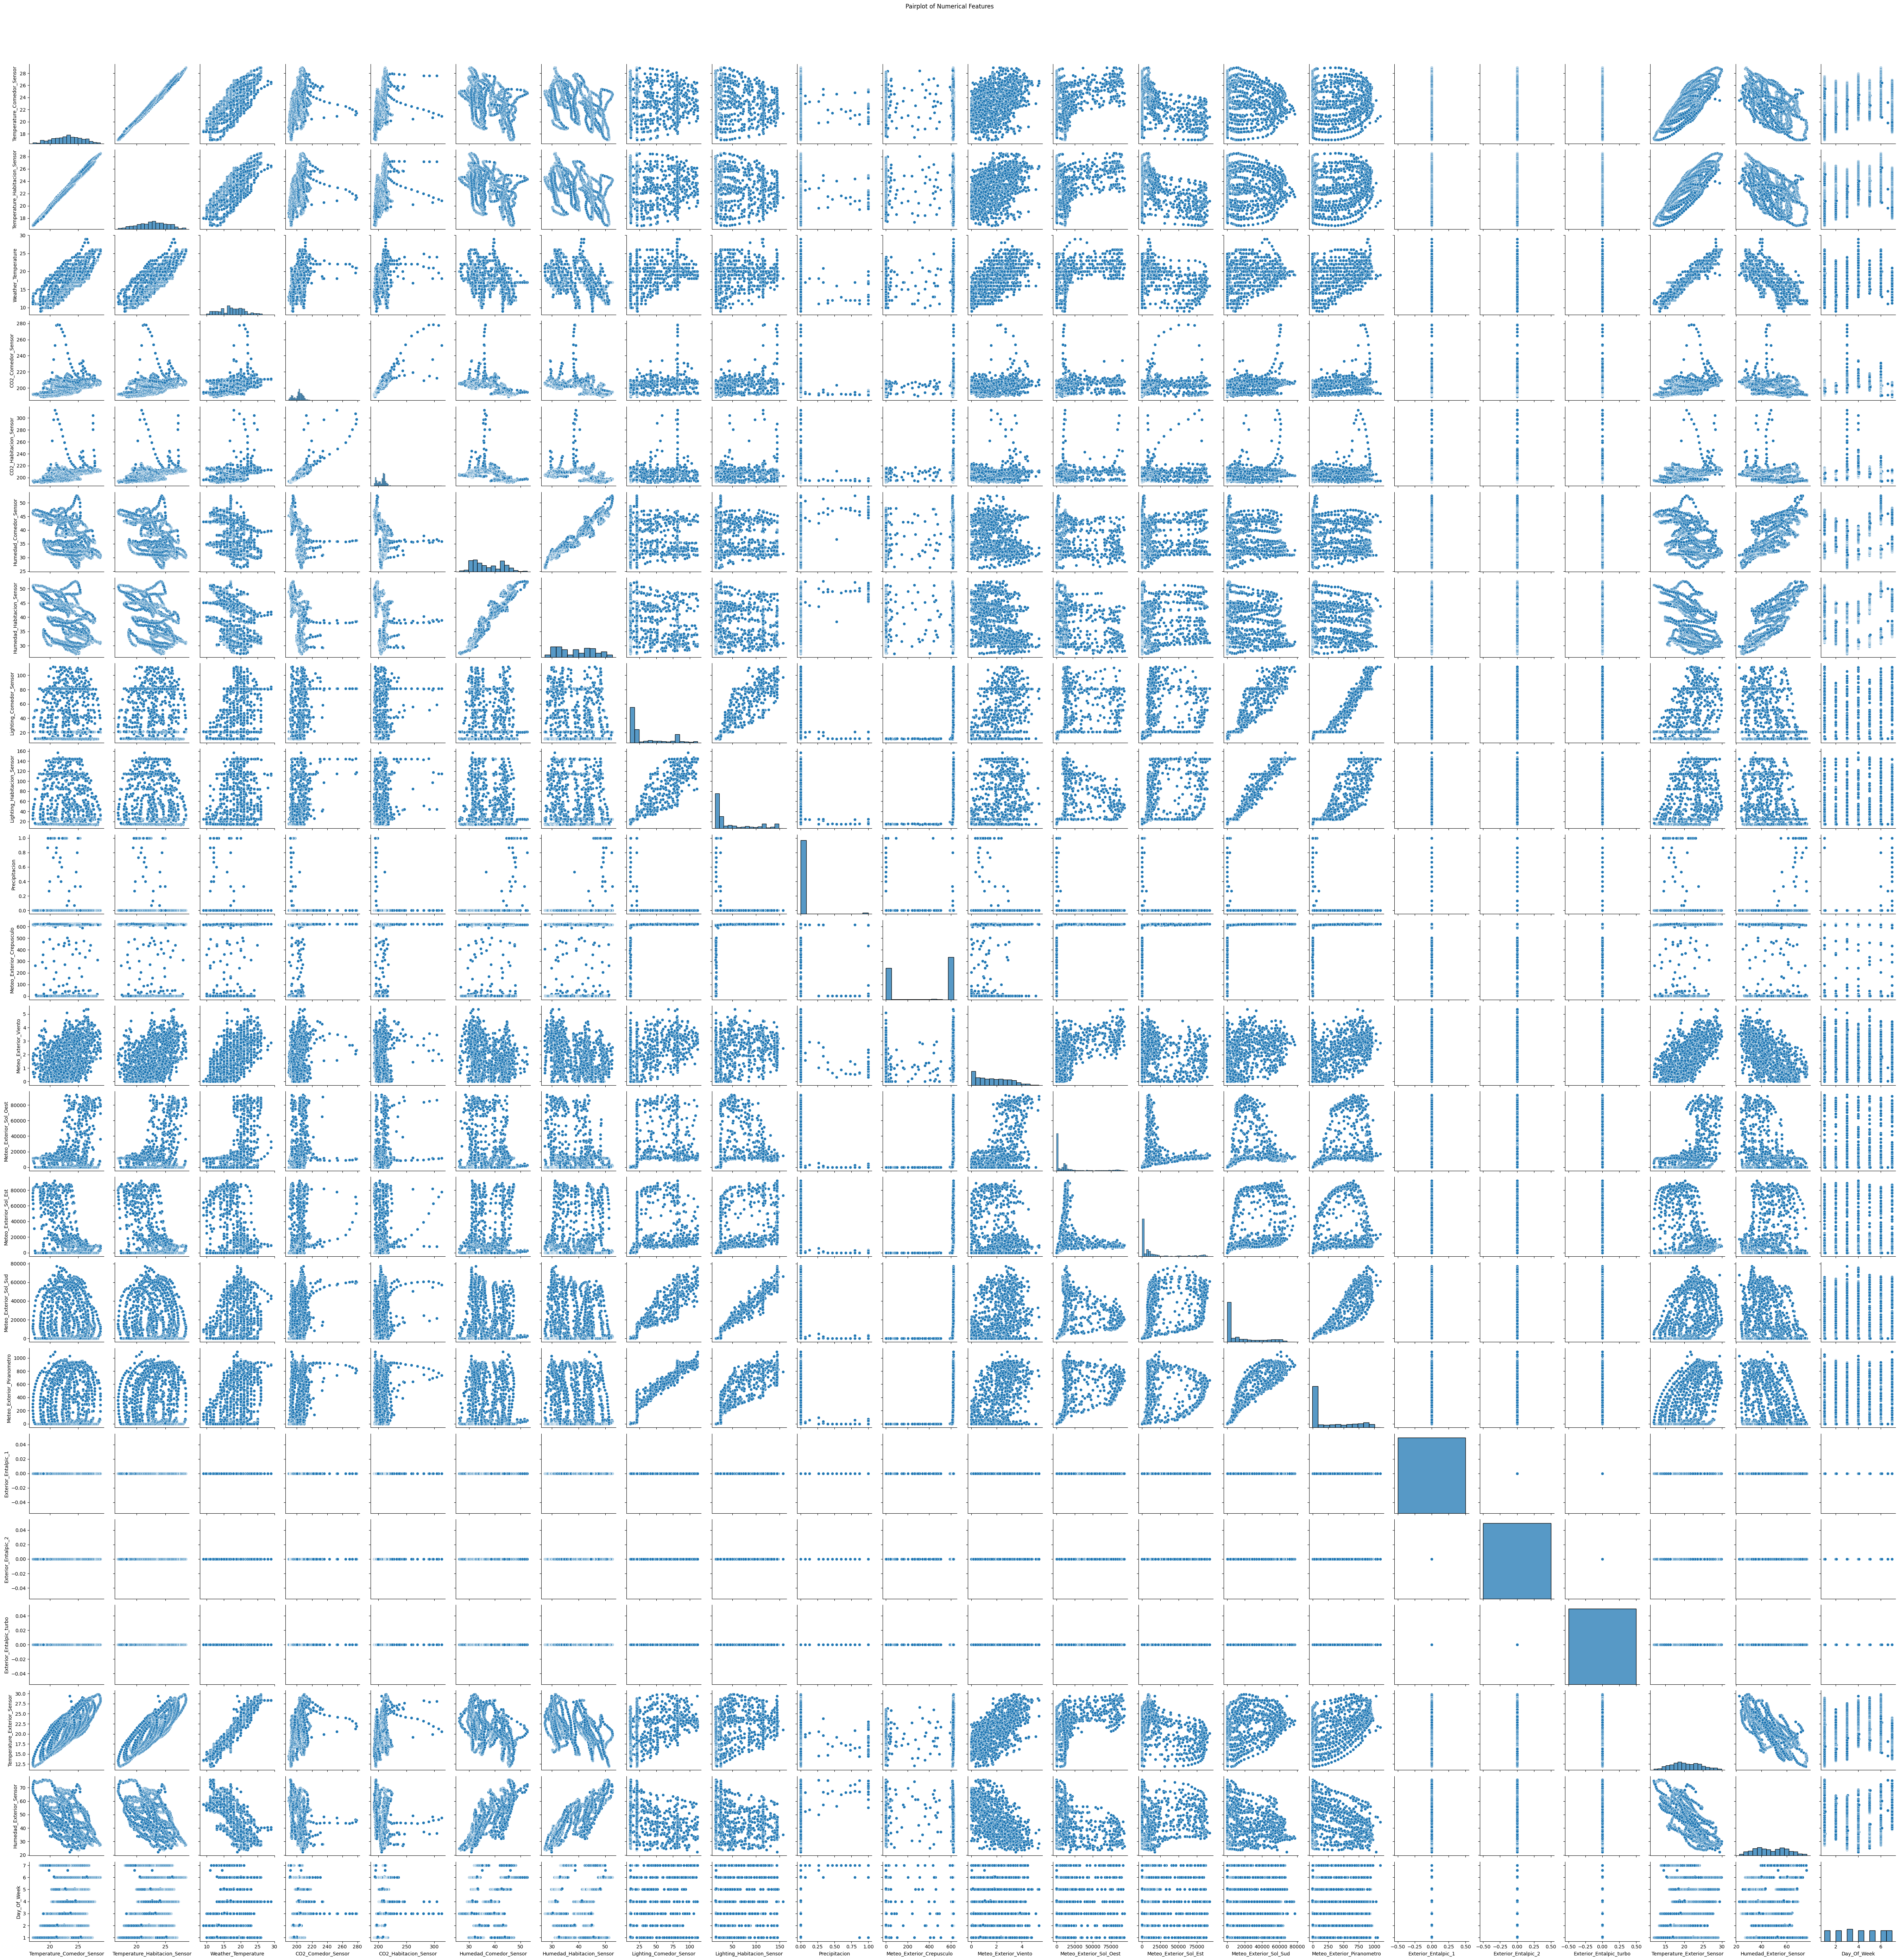

In [45]:
# Pairplot to visualize relationships between features
sns.pairplot(df2.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Additional EDA Techniques
In this section, we perform advanced EDA techniques to gain deeper insights into the dataset.

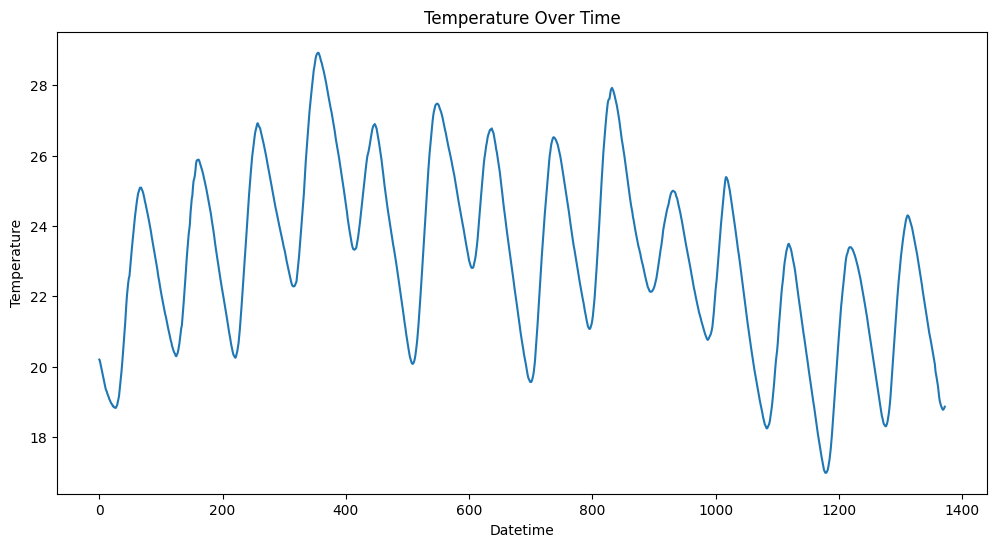

In [46]:
# Time Series Analysis
df2['Temperature_Comedor_Sensor'] = pd.to_numeric(df2['Temperature_Comedor_Sensor'], errors='coerce')
df2['Temperature_Comedor_Sensor'].plot(figsize=(12, 6))
plt.title('Temperature Over Time')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.show()

Day_Of_Week
3.00000    219
4.00000    190
5.00000    190
2.00000    190
7.00000    190
6.00000    190
1.00000    190
5.06667      2
3.06667      2
4.06667      2
6.60000      2
6.06667      2
1.06667      2
2.06667      2
Name: count, dtype: int64


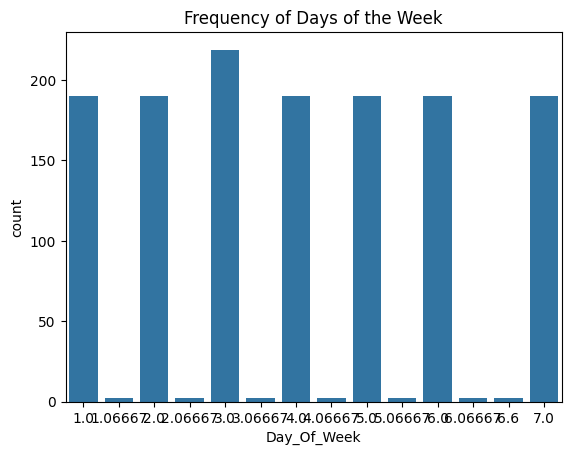

In [47]:
# Categorical Data Analysis
print(df2['Day_Of_Week'].value_counts())
sns.countplot(x='Day_Of_Week', data=df2)
plt.title('Frequency of Days of the Week')
plt.show()

Day_Of_Week
1.00000    22.186977
1.06667    23.293300
2.00000    23.014192
2.06667    21.872000
3.00000    22.168087
3.06667    23.094650
4.00000    23.813976
4.06667    23.740650
5.00000    23.628215
5.06667    23.540000
6.00000    24.143024
6.06667    23.593350
6.60000    21.482350
7.00000    22.885499
Name: Temperature_Comedor_Sensor, dtype: float64


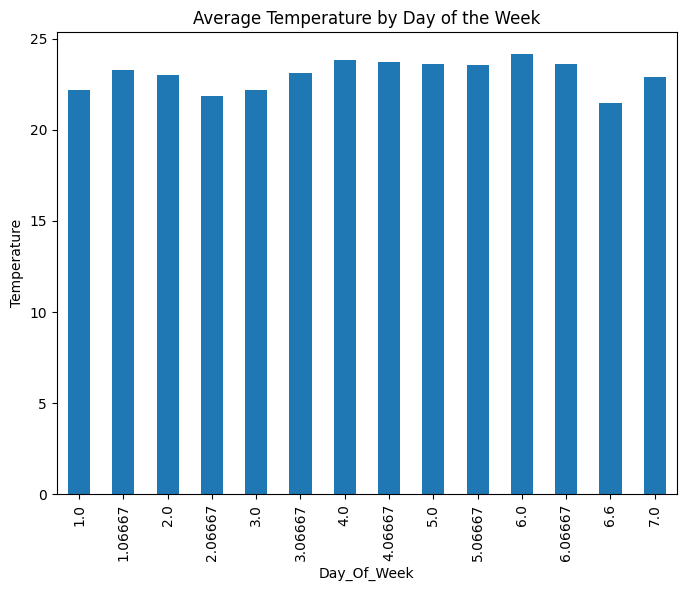

In [48]:
# Group-by Analysis
avg_temp_by_day = df2.groupby('Day_Of_Week')['Temperature_Comedor_Sensor'].mean()
print(avg_temp_by_day)
avg_temp_by_day.plot(kind='bar', figsize=(8, 6))
plt.title('Average Temperature by Day of the Week')
plt.ylabel('Temperature')
plt.show()

In [49]:
# Anomaly Detection
df2['Temperature_Zscore'] = zscore(df2['Temperature_Comedor_Sensor'])
anomalies = df2[(df2['Temperature_Zscore'] > 3) | (df2['Temperature_Zscore'] < -3)]
print('Anomalies:')
print(anomalies)

Anomalies:
Empty DataFrame
Columns: [Date, Time, Temperature_Comedor_Sensor, Temperature_Habitacion_Sensor, Weather_Temperature, CO2_Comedor_Sensor, CO2_Habitacion_Sensor, Humedad_Comedor_Sensor, Humedad_Habitacion_Sensor, Lighting_Comedor_Sensor, Lighting_Habitacion_Sensor, Precipitacion, Meteo_Exterior_Crepusculo, Meteo_Exterior_Viento, Meteo_Exterior_Sol_Oest, Meteo_Exterior_Sol_Est, Meteo_Exterior_Sol_Sud, Meteo_Exterior_Piranometro, Exterior_Entalpic_1, Exterior_Entalpic_2, Exterior_Entalpic_turbo, Temperature_Exterior_Sensor, Humedad_Exterior_Sensor, Day_Of_Week, Hour, Month, Temperature_Zscore]
Index: []

[0 rows x 27 columns]


Season
Spring    23.098108
Name: Temperature_Comedor_Sensor, dtype: float64


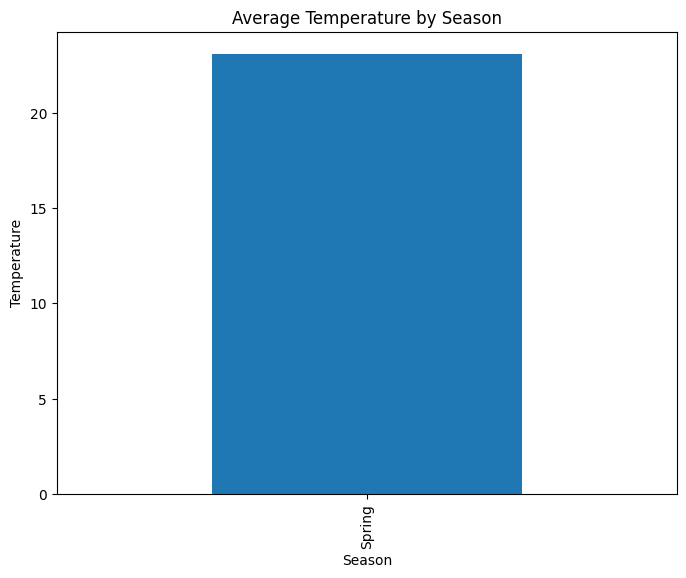

In [50]:
# Seasonal Analysis
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df2['Season'] = df2['Month'].apply(get_season)
avg_temp_by_season = df2.groupby('Season')['Temperature_Comedor_Sensor'].mean()
print(avg_temp_by_season)
avg_temp_by_season.plot(kind='bar', figsize=(8, 6))
plt.title('Average Temperature by Season')
plt.ylabel('Temperature')
plt.show()

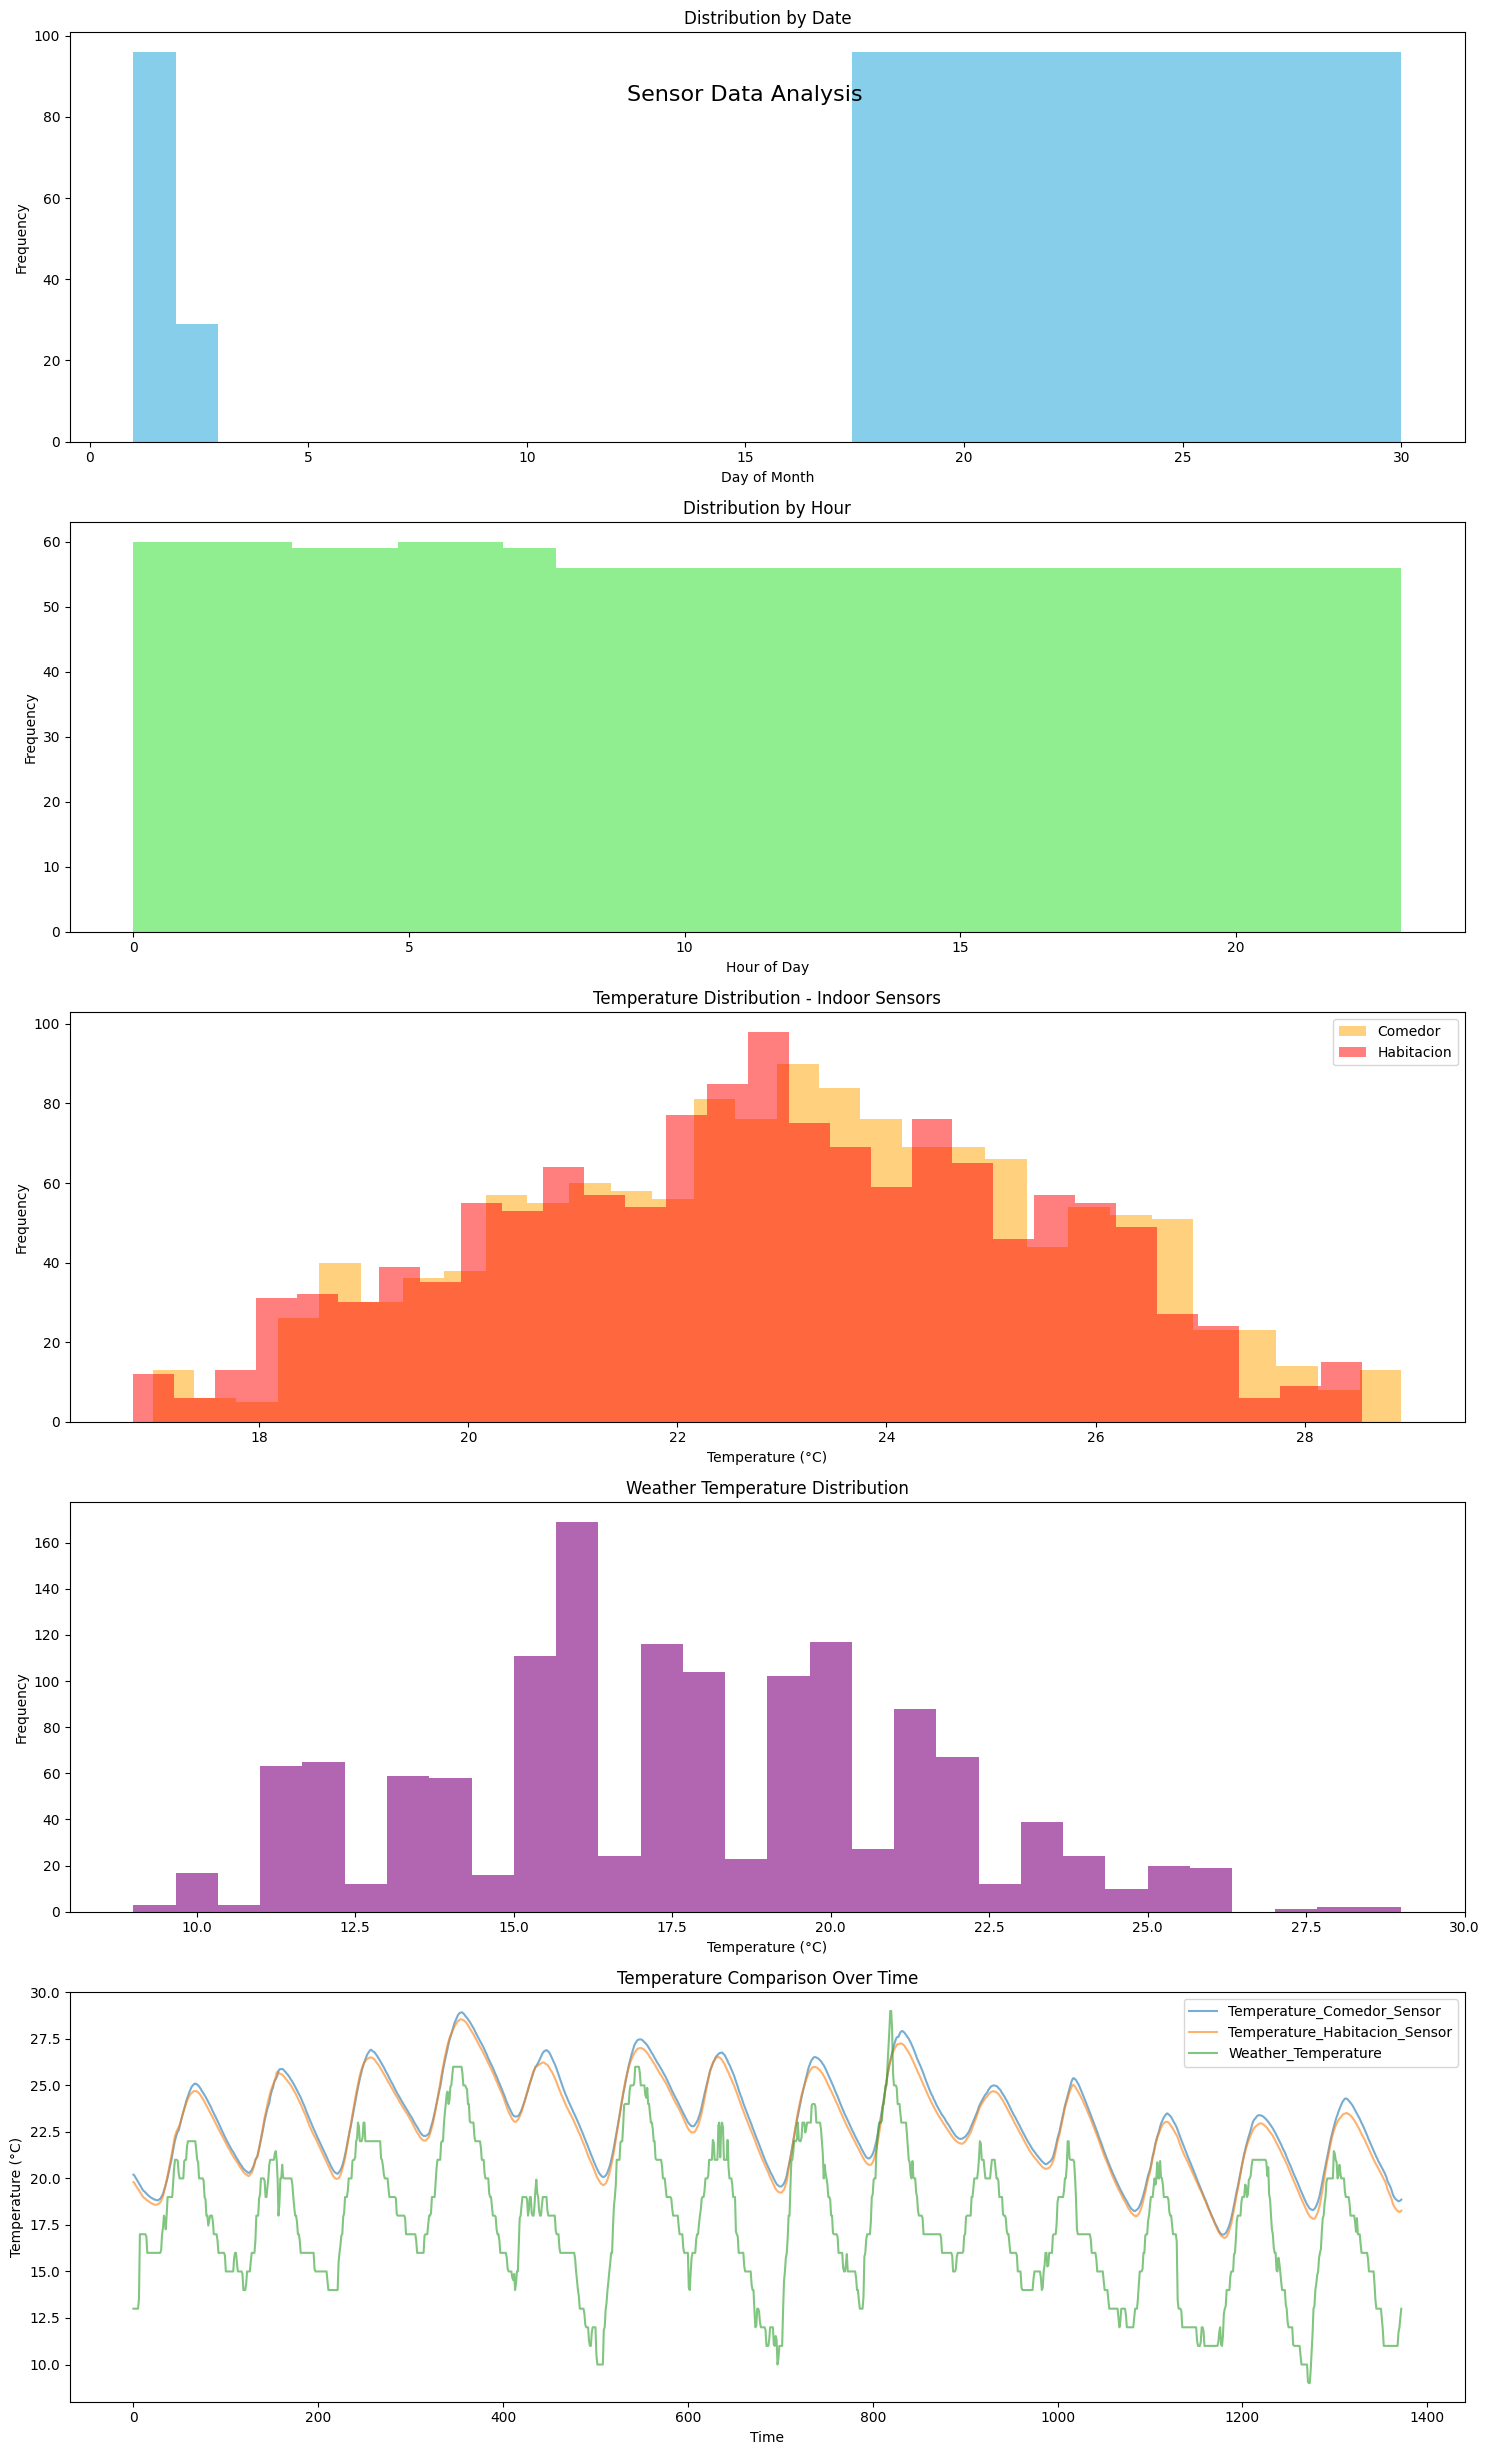

In [51]:
# Create a figure with subplots, properly spaced
fig, axs = plt.subplots(5, 1, figsize=(15, 25))
fig.suptitle('Sensor Data Analysis', fontsize=16, y=0.95)

# Plot 1: Date Distribution
axs[0].hist(df2['Date'].dt.day, bins=30, color='skyblue')
axs[0].set_title('Distribution by Date')
axs[0].set_xlabel('Day of Month')
axs[0].set_ylabel('Frequency')

# Plot 2: Time Distribution
axs[1].hist(df2['Hour'], bins=24, color='lightgreen')
axs[1].set_title('Distribution by Hour')
axs[1].set_xlabel('Hour of Day')
axs[1].set_ylabel('Frequency')

# Plot 3: Temperature Distributions
axs[2].hist(df2['Temperature_Comedor_Sensor'], bins=30, alpha=0.5, label='Comedor', color='orange')
axs[2].hist(df2['Temperature_Habitacion_Sensor'], bins=30, alpha=0.5, label='Habitacion', color='red')
axs[2].set_title('Temperature Distribution - Indoor Sensors')
axs[2].set_xlabel('Temperature (°C)')
axs[2].set_ylabel('Frequency')
axs[2].legend()

# Plot 4: Weather Temperature
axs[3].hist(df2['Weather_Temperature'], bins=30, color='purple', alpha=0.6)
axs[3].set_title('Weather Temperature Distribution')
axs[3].set_xlabel('Temperature (°C)')
axs[3].set_ylabel('Frequency')

# Plot 5: Temperature Comparison
df2.plot(y=['Temperature_Comedor_Sensor', 'Temperature_Habitacion_Sensor', 'Weather_Temperature'],
        ax=axs[4], alpha=0.6)
axs[4].set_title('Temperature Comparison Over Time')
axs[4].set_xlabel('Time')
axs[4].set_ylabel('Temperature (°C)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

ARIMA Model Summary:
                                   SARIMAX Results                                    
Dep. Variable:     Temperature_Comedor_Sensor   No. Observations:                 1375
Model:                         ARIMA(5, 1, 0)   Log Likelihood                3089.284
Date:                        Thu, 24 Apr 2025   AIC                          -6166.569
Time:                                20:36:35   BIC                          -6135.216
Sample:                            04-18-2012   HQIC                         -6154.837
                                 - 05-02-2012                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8102      0.018     44.206      0.000       0.774       0.846
ar.L2          0.2323      0.025      9.396   

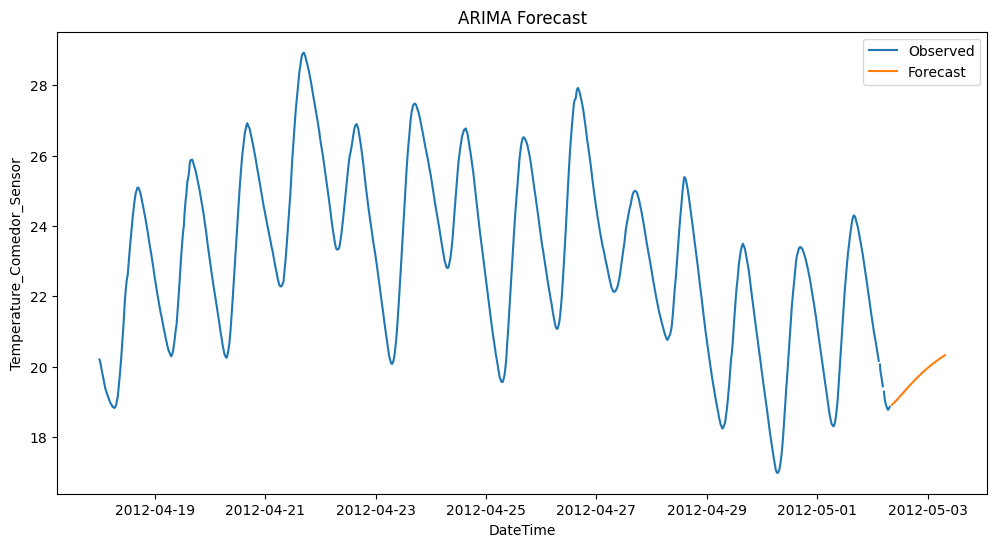

In [52]:
# Additional imports for time series forecasting
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

# Prepare time series data for statsmodels and darts
df2['DateTime'] = pd.to_datetime(df2['Date'].dt.strftime('%Y-%m-%d') + ' ' + df2['Time'].dt.strftime('%H:%M:%S'))
df2 = df2.sort_values('DateTime')

ts_data = df2.set_index('DateTime')['Temperature_Comedor_Sensor'].astype(float)
ts_data = ts_data.interpolate(method='time')
ts_data = ts_data.asfreq('15T')  # Set explicit frequency to 15 minutes


# Statsmodels ARIMA model
arima_order = (5,1,0)  # example order, can be tuned
arima_model = sm.tsa.ARIMA(ts_data, order=arima_order)
arima_result = arima_model.fit()

# Forecast next 24 periods (assuming hourly data)
forecast_steps = 24
arima_forecast = arima_result.forecast(steps=forecast_steps)

print("ARIMA Model Summary:")
print(arima_result.summary())

# Plot ARIMA forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(ts_data.index, ts_data, label='Observed')
plt.plot(pd.date_range(ts_data.index[-1], periods=forecast_steps+1, freq='h')[1:], arima_forecast, label='Forecast')

plt.title('ARIMA Forecast')
plt.xlabel('DateTime')
plt.ylabel('Temperature_Comedor_Sensor')
plt.legend()
plt.show()


In [1]:
# 3D plot (requires matplotlib 3D axes)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['Temperature_Habitacion_Sensor'], 
           df1['CO2_Comedor_Sensor'], 
           df1['Temperature_Comedor_Sensor'])
ax.set_xlabel('Room Temp')
ax.set_ylabel('CO2')
ax.set_zlabel('Dining Temp')
plt.show()

NameError: name 'plt' is not defined